In [1]:
# This is where work will be.

##### Importing

In [2]:
import pandas as pd  # Alias pandas to be referred to as pd
import numpy as np  # Alias numpy to be referred to as np
import matplotlib.pyplot as plt  # Alias matplotlib.pyplot to be referred to as plt
import seaborn as sns  # Alias seaborn to be referred to as sns
from glob import glob
import os

# Magic funtion to allow plot outputs to appear and be stored within out notebook
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read in initial dataframes

In [4]:
df = pd.read_csv("data/bom.movie_gross.csv.gz")
df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [6]:
df.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [7]:
#sqlite3 for sql dataset

In [8]:
#make sure sqlite3 is downloaded and working
#make sure sqlite db file has been unzipped
import sqlite3
sqlite3.version

'2.6.0'

In [9]:
# Create new Database

In [10]:
# Instantiate a connection
connection = sqlite3.connect("data/im.db")

In [11]:
# Instantiate a cursor
cursor = connection.cursor()

In [12]:
# sql query for list of tables
sql_query = """SELECT name FROM sqlite_master WHERE type='table';"""
cursor.execute(sql_query)
print(cursor.fetchall())

[('movie_basics',), ('directors',), ('known_for',), ('movie_akas',), ('movie_ratings',), ('persons',), ('principals',), ('writers',)]


In [13]:
# a function that should provide list of tables
def sql_fetch(con):
    """
    Function that takes in a connection, and outputs a list of tables in db
    Creates a cursor object to allow us to execute sqlite queries through Python
    Cursor executes the query that accesses the sqlite_master file and returns table names
    Fetch all names from query result
    """
    cursorObj = con.cursor()
    cursorObj.execute('SELECT name from sqlite_master where type= "table"')
    print(cursorObj.fetchall())
    
sql_fetch(connection)

[('movie_basics',), ('directors',), ('known_for',), ('movie_akas',), ('movie_ratings',), ('persons',), ('principals',), ('writers',)]


In [14]:
# Create movie_basics_df
movie_basics_df = pd.read_sql("""SELECT * FROM movie_basics""",connection)
movie_basics_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [15]:
movie_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [16]:
movie_basics_df.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


In [17]:
# Create moview_ratings_df with different method
movie_ratings_df = pd.read_sql_query("""SELECT * FROM movie_ratings""",connection)
movie_ratings_df.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [18]:
movie_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [19]:
movie_ratings_df.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [20]:
# Dataframes:

#   df
#   movie_basics_df
#   movie_ratings_df

##### Cleaning

In [21]:
# Check for duplicates
print(movie_basics_df.duplicated().any())
print(movie_ratings_df.duplicated().any())

False
False


In [80]:
# Return the count of placeholder values
movie_basics_df.isin(['?', '#', 'NaN', 'null', 'N/A', '-', 0]).sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

In [81]:
# Return the count of placeholder values
movie_ratings_df.isin(['?', '#', 'NaN', 'null', 'N/A', '-', 0]).sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

In [59]:
# Merge sqlite3 tables to make pandas DataFrame (pandas & sqlite)
join_movie_id = """SELECT * 
FROM movie_basics
INNER JOIN movie_ratings
ON movie_basics.movie_id = movie_ratings.movie_id
"""

In [61]:
imdb_df = pd.DataFrame(cursor.execute(join_movie_id).fetchall())
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       73856 non-null  object 
 1   1       73856 non-null  object 
 2   2       73856 non-null  object 
 3   3       73856 non-null  int64  
 4   4       66236 non-null  float64
 5   5       73052 non-null  object 
 6   6       73856 non-null  object 
 7   7       73856 non-null  float64
 8   8       73856 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 5.1+ MB


In [62]:
# Another way of joining the sql tables (pandas only)

In [22]:
# Merge imdb data
imdb_df = pd.merge(left=movie_basics_df, right=movie_ratings_df, on="movie_id")
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


In [23]:
imdb_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [24]:
imdb_df. rename(columns = {"primary_title":"title"}, inplace = True)
imdb_df.head()

,movie_id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [25]:
# Make super_df with most merged data
super_df = pd.merge(left=df, right=imdb_df, on="title")
super_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3027 entries, 0 to 3026
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            3027 non-null   object 
 1   studio           3024 non-null   object 
 2   domestic_gross   3005 non-null   float64
 3   foreign_gross    1832 non-null   object 
 4   year             3027 non-null   int64  
 5   movie_id         3027 non-null   object 
 6   original_title   3027 non-null   object 
 7   start_year       3027 non-null   int64  
 8   runtime_minutes  2980 non-null   float64
 9   genres           3020 non-null   object 
 10  averagerating    3027 non-null   float64
 11  numvotes         3027 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 307.4+ KB


In [26]:
super_df.head()

,title,studio,domestic_gross,foreign_gross,year,movie_id,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",6.3,167532
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",5.0,211733
4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690


In [36]:
super_df.isnull().sum()

title               0
studio              3
domestic_gross     22
year                0
runtime_minutes    47
genres              7
averagerating       0
numvotes            0
dtype: int64

In [27]:
# Now clean super_df 

# GOALS

# remove foreign_gross, original_title, movie_id, start_year 
# base on runtime_minutes count

In [28]:
super_df.drop(["foreign_gross", "original_title", "movie_id", "start_year"], axis=1, inplace=True)

In [29]:
super_df.head()

,title,studio,domestic_gross,year,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,2010,103.0,"Adventure,Animation,Comedy",8.3,682218
1,Inception,WB,292600000.0,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2,Shrek Forever After,P/DW,238700000.0,2010,93.0,"Adventure,Animation,Comedy",6.3,167532
3,The Twilight Saga: Eclipse,Sum.,300500000.0,2010,124.0,"Adventure,Drama,Fantasy",5.0,211733
4,Iron Man 2,Par.,312400000.0,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690


In [30]:
# https://www.machinelearningplus.com/pandas/pandas-dropna-how-to-drop-missing-values/#:~:text=Dropping%20rows%20if%20missing%20values,names%20to%20the%20subset%20parameter.

In [31]:
clean_df = super_df.dropna(subset=['runtime_minutes'])
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2980 entries, 0 to 3026
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            2980 non-null   object 
 1   studio           2977 non-null   object 
 2   domestic_gross   2958 non-null   float64
 3   year             2980 non-null   int64  
 4   runtime_minutes  2980 non-null   float64
 5   genres           2975 non-null   object 
 6   averagerating    2980 non-null   float64
 7   numvotes         2980 non-null   int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 209.5+ KB


In [32]:
clean_df = clean_df.dropna(subset=['domestic_gross'])
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2958 entries, 0 to 3026
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            2958 non-null   object 
 1   studio           2957 non-null   object 
 2   domestic_gross   2958 non-null   float64
 3   year             2958 non-null   int64  
 4   runtime_minutes  2958 non-null   float64
 5   genres           2953 non-null   object 
 6   averagerating    2958 non-null   float64
 7   numvotes         2958 non-null   int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 208.0+ KB


In [33]:
clean_df = clean_df.dropna(subset=['genres'])
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2953 entries, 0 to 3026
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            2953 non-null   object 
 1   studio           2952 non-null   object 
 2   domestic_gross   2953 non-null   float64
 3   year             2953 non-null   int64  
 4   runtime_minutes  2953 non-null   float64
 5   genres           2953 non-null   object 
 6   averagerating    2953 non-null   float64
 7   numvotes         2953 non-null   int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 207.6+ KB


In [34]:
clean_df = clean_df.dropna(subset=['studio'])
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2952 entries, 0 to 3026
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            2952 non-null   object 
 1   studio           2952 non-null   object 
 2   domestic_gross   2952 non-null   float64
 3   year             2952 non-null   int64  
 4   runtime_minutes  2952 non-null   float64
 5   genres           2952 non-null   object 
 6   averagerating    2952 non-null   float64
 7   numvotes         2952 non-null   int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 207.6+ KB


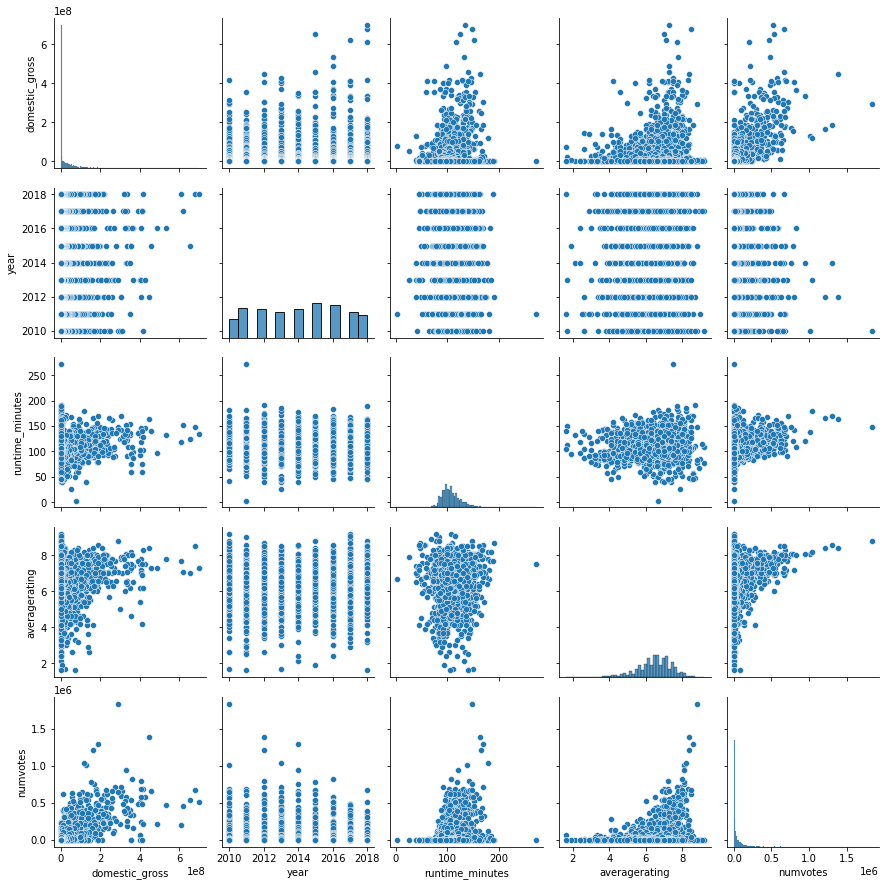

In [35]:
# view distributions of numeric variables
sns.pairplot(clean_df)

##### Explore

In [38]:
top_gross = clean_df.sort_values(by="domestic_gross", ascending=False)
top_gross.head(10)

,title,studio,domestic_gross,year,runtime_minutes,genres,averagerating,numvotes
2752,Black Panther,BV,700100000.0,2018,134.0,"Action,Adventure,Sci-Fi",7.3,516148
2751,Avengers: Infinity War,BV,678800000.0,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926
1616,Jurassic World,Uni.,652300000.0,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338
2435,Star Wars: The Last Jedi,BV,620200000.0,2017,152.0,"Action,Adventure,Fantasy",7.1,462903
2754,Incredibles 2,BV,608600000.0,2018,118.0,"Action,Adventure,Animation",7.7,203510
2031,Rogue One: A Star Wars Story,BV,532200000.0,2016,133.0,"Action,Adventure,Sci-Fi",7.8,478592
2032,Finding Dory,BV,486300000.0,2016,97.0,"Adventure,Animation,Comedy",7.3,213542
1618,Avengers: Age of Ultron,BV,459000000.0,2015,141.0,"Action,Adventure,Sci-Fi",7.3,665594
598,The Dark Knight Rises,WB,448100000.0,2012,164.0,"Action,Thriller",8.4,1387769
958,The Hunger Games: Catching Fire,LGF,424700000.0,2013,146.0,"Action,Adventure,Sci-Fi",7.5,575455


In [39]:
# How new is the data
top_gross["year"].max()

2018

In [40]:
# What is the hightest rating
top_gross["averagerating"].max()

9.2

In [43]:
# Which movie has the highest rating
top_gross.loc[top_gross['averagerating'].idxmax()]

title              The Runaways
studio                     App.
domestic_gross        3600000.0
year                       2010
runtime_minutes           108.0
genres                Adventure
averagerating               9.2
numvotes                     47
Name: 165, dtype: object

In [45]:
print(clean_df["genres"].unique())


['Adventure,Animation,Comedy' 'Action,Adventure,Sci-Fi'
 'Adventure,Drama,Fantasy' 'Animation,Comedy,Family'
 'Action,Adventure,Animation' 'Adventure,Family,Fantasy'
 'Biography,Drama,History' 'Action,Drama,Family'
 'Action,Adventure,Fantasy' 'Drama,Thriller' 'Action,Animation,Comedy'
 'Action,Adventure,Drama' 'Action,Drama' 'Action,Adventure,Thriller'
 'Action,Adventure,Family' 'Comedy,Romance' 'Action,Adventure,Horror'
 'Mystery,Thriller' 'Action,Mystery,Thriller' 'Comedy,Drama,Romance'
 'Comedy' 'Adventure,Drama,Western' 'Adventure,Comedy,Family'
 'Biography,Drama' 'Adventure,Comedy' 'Drama,Romance' 'Drama' 'Horror'
 'Action,Comedy,Crime' 'Action,Thriller' 'Documentary' 'Action,Crime'
 'Crime,Drama,Thriller' 'Comedy,Crime,Romance' 'Drama,Fantasy,Horror'
 'Action,Comedy,Romance' 'Biography,Drama,Sport' 'Drama,Romance,War'
 'Action,Comedy,Family' 'Comedy,Family,Fantasy' 'Drama,Fantasy,Romance'
 'Crime,Drama,Mystery' 'Action,Crime,Drama' 'Action,Comedy'
 'Action,Drama,Thriller' 'Advent

In [46]:
print(clean_df["genres"].nunique())

317


In [47]:
top_gross["genres"] = top_gross["genres"].apply(lambda x: x.split(",") if x else x)
top_gross.head()

,title,studio,domestic_gross,year,runtime_minutes,genres,averagerating,numvotes
2752,Black Panther,BV,700100000.0,2018,134.0,"[Action, Adventure, Sci-Fi]",7.3,516148
2751,Avengers: Infinity War,BV,678800000.0,2018,149.0,"[Action, Adventure, Sci-Fi]",8.5,670926
1616,Jurassic World,Uni.,652300000.0,2015,124.0,"[Action, Adventure, Sci-Fi]",7.0,539338
2435,Star Wars: The Last Jedi,BV,620200000.0,2017,152.0,"[Action, Adventure, Fantasy]",7.1,462903
2754,Incredibles 2,BV,608600000.0,2018,118.0,"[Action, Adventure, Animation]",7.7,203510


In [48]:
all_genres = set()

for genres in top_gross["genres"]:
    if genres:
        all_genres.update(genres)

all_genres

{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western'}

In [49]:
# Iterate through the set.
for genre in all_genres:
    # Make a new column in dataframe and fill the columns with zeros.
    top_gross[genre] = np.zeros(shape=top_gross.shape[0])
# Check that the changes took place.                                
top_gross.head()

,title,studio,domestic_gross,year,runtime_minutes,genres,averagerating,numvotes,War,Adventure,...,Biography,Drama,Crime,Family,Musical,History,Comedy,Action,Romance,Animation
2752,Black Panther,BV,700100000.0,2018,134.0,"[Action, Adventure, Sci-Fi]",7.3,516148,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2751,Avengers: Infinity War,BV,678800000.0,2018,149.0,"[Action, Adventure, Sci-Fi]",8.5,670926,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1616,Jurassic World,Uni.,652300000.0,2015,124.0,"[Action, Adventure, Sci-Fi]",7.0,539338,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2435,Star Wars: The Last Jedi,BV,620200000.0,2017,152.0,"[Action, Adventure, Fantasy]",7.1,462903,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2754,Incredibles 2,BV,608600000.0,2018,118.0,"[Action, Adventure, Animation]",7.7,203510,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
# Iterate through the genres column as an index
# the genre rows. 
for index, row in top_gross.iterrows():
    # If the value in genres
    if row['genres']:
        # mathces a genre column
        for genre in row['genres']:
            # change that value to 1.
            top_gross.loc[index, genre] = 1
# Lets check our changes.
top_gross.head()

,title,studio,domestic_gross,year,runtime_minutes,genres,averagerating,numvotes,War,Adventure,...,Biography,Drama,Crime,Family,Musical,History,Comedy,Action,Romance,Animation
2752,Black Panther,BV,700100000.0,2018,134.0,"[Action, Adventure, Sci-Fi]",7.3,516148,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2751,Avengers: Infinity War,BV,678800000.0,2018,149.0,"[Action, Adventure, Sci-Fi]",8.5,670926,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1616,Jurassic World,Uni.,652300000.0,2015,124.0,"[Action, Adventure, Sci-Fi]",7.0,539338,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2435,Star Wars: The Last Jedi,BV,620200000.0,2017,152.0,"[Action, Adventure, Fantasy]",7.1,462903,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2754,Incredibles 2,BV,608600000.0,2018,118.0,"[Action, Adventure, Animation]",7.7,203510,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [52]:
# Lets make a list of all the genres. First make a list of all the columns of the dataframe.
cols = list(top_gross.columns)

In [53]:
# Now index those columns that are associated with the genres and assign them a new name.
genre_cols = cols[8:]

In [54]:
# Create a new dictionary
genre_count = {}
# Iterate through the columns associated with genres, setting the name of the
# column as the keys in the dictionary.
for col in genre_cols:
    # Get the total of all the genre counts where the value equaled 1,
    # which we set previously
    count = np.sum(top_gross[col] == 1).sum()
    # Set the values of the dictionary equal to the total of the counts
    genre_count[col] = count

In [55]:
genre_count

{'War': 50,
 'Adventure': 437,
 'Music': 90,
 'Thriller': 440,
 'Documentary': 219,
 'Sport': 52,
 'Sci-Fi': 134,
 'Mystery': 204,
 'News': 4,
 'Western': 21,
 'Fantasy': 168,
 'Horror': 232,
 'Biography': 285,
 'Drama': 1722,
 'Crime': 376,
 'Family': 113,
 'Musical': 17,
 'History': 134,
 'Comedy': 916,
 'Action': 633,
 'Romance': 465,
 'Animation': 150}

In [66]:
len(genre_count)

22

In [56]:
# Create a list of the dictionary keys
keys = list(genre_count.keys())
# Create a list of the dictionary values
values = list(genre_count.values())

In [ ]:
https://stackoverflow.com/questions/56360610/sum-column-based-on-another-column-in-pandas-dataframe

In [86]:
action_total

(array([ 337,  686,  698, 1096, 1170, 1278, 1413, 1818, 1932, 2047, 2131,
        2285, 2459, 2552, 2904]),)

In [91]:
# Create new column based on funder occurrences.
clean_df['genre_totals'] = clean_df.domestic_gross.groupby(clean_df.genres).transform('sum')

In [102]:
clean_df.head(2)

,title,studio,domestic_gross,year,runtime_minutes,genres,averagerating,numvotes,genre_totals,genre_avg,genre_avg_gross
0,Toy Story 3,BV,415000000.0,2010,103.0,"Adventure,Animation,Comedy",8.3,682218,9.645133e+09,1.286018e+08,1.286018e+08
1,Inception,WB,292600000.0,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,1.102470e+10,2.345681e+08,2.345681e+08


In [94]:
# Create new column based on funder occurrences.
clean_df['genre_avg_gross'] = clean_df.domestic_gross.groupby(clean_df.genres).transform('sum')/clean_df.domestic_gross.groupby(clean_df.genres).transform('count')
clean_df.head(10)

,title,studio,domestic_gross,year,runtime_minutes,genres,averagerating,numvotes,genre_totals,genre_avg,genre_avg_gross
0,Toy Story 3,BV,415000000.0,2010,103.0,"Adventure,Animation,Comedy",8.3,682218,9.645133e+09,1.286018e+08,1.286018e+08
1,Inception,WB,292600000.0,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,1.102470e+10,2.345681e+08,2.345681e+08
2,Shrek Forever After,P/DW,238700000.0,2010,93.0,"Adventure,Animation,Comedy",6.3,167532,9.645133e+09,1.286018e+08,1.286018e+08
3,The Twilight Saga: Eclipse,Sum.,300500000.0,2010,124.0,"Adventure,Drama,Fantasy",5.0,211733,5.894000e+08,1.178800e+08,1.178800e+08
4,Iron Man 2,Par.,312400000.0,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690,1.102470e+10,2.345681e+08,2.345681e+08
5,Tangled,BV,200800000.0,2010,100.0,"Adventure,Animation,Comedy",7.8,366366,9.645133e+09,1.286018e+08,1.286018e+08
6,Despicable Me,Uni.,251500000.0,2010,95.0,"Animation,Comedy,Family",7.7,464511,8.753285e+08,1.250469e+08,1.250469e+08
7,How to Train Your Dragon,P/DW,217600000.0,2010,98.0,"Action,Adventure,Animation",8.1,611299,2.184660e+09,9.930275e+07,9.930275e+07
8,The Chronicles of Narnia: The Voyage of the Da...,Fox,104400000.0,2010,113.0,"Adventure,Family,Fantasy",6.3,129663,9.235000e+08,1.154375e+08,1.154375e+08
9,The King's Speech,Wein.,135500000.0,2010,118.0,"Biography,Drama,History",8.0,593629,1.275551e+09,2.898980e+07,2.898980e+07


In [98]:
gross_genre_df = clean_df.sort_values(by="genre_avg_gross", ascending=False)
gross_genre_df.head(10)

,title,studio,domestic_gross,year,runtime_minutes,genres,averagerating,numvotes,genre_totals,genre_avg,genre_avg_gross
952,Frozen,BV,400700000.0,2013,93.0,"Adventure,Drama,Sport",6.2,62311,4.007000e+08,4.007000e+08,4.007000e+08
603,The Hunger Games,LGF,408000000.0,2012,142.0,"Action,Adventure,Sci-Fi",7.2,795227,1.102470e+10,2.345681e+08,2.345681e+08
966,Star Trek Into Darkness,Par.,228800000.0,2013,132.0,"Action,Adventure,Sci-Fi",7.7,445535,1.102470e+10,2.345681e+08,2.345681e+08
2752,Black Panther,BV,700100000.0,2018,134.0,"Action,Adventure,Sci-Fi",7.3,516148,1.102470e+10,2.345681e+08,2.345681e+08
2751,Avengers: Infinity War,BV,678800000.0,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926,1.102470e+10,2.345681e+08,2.345681e+08
977,Oblivion,Uni.,89100000.0,2013,124.0,"Action,Adventure,Sci-Fi",7.0,453966,1.102470e+10,2.345681e+08,2.345681e+08
1618,Avengers: Age of Ultron,BV,459000000.0,2015,141.0,"Action,Adventure,Sci-Fi",7.3,665594,1.102470e+10,2.345681e+08,2.345681e+08
1616,Jurassic World,Uni.,652300000.0,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,1.102470e+10,2.345681e+08,2.345681e+08
1270,The Hunger Games: Mockingjay - Part 1,LGF,337100000.0,2014,123.0,"Action,Adventure,Sci-Fi",6.6,379050,1.102470e+10,2.345681e+08,2.345681e+08
970,G.I. Joe: Retaliation,Par.,122500000.0,2013,110.0,"Action,Adventure,Sci-Fi",5.8,165536,1.102470e+10,2.345681e+08,2.345681e+08


In [99]:
gross_genre_df = gross_genre_df.drop_duplicates(subset='genres', keep="first")

In [100]:
gross_genre_df.head(10)

,title,studio,domestic_gross,year,runtime_minutes,genres,averagerating,numvotes,genre_totals,genre_avg,genre_avg_gross
952,Frozen,BV,400700000.0,2013,93.0,"Adventure,Drama,Sport",6.2,62311,4.007000e+08,4.007000e+08,4.007000e+08
603,The Hunger Games,LGF,408000000.0,2012,142.0,"Action,Adventure,Sci-Fi",7.2,795227,1.102470e+10,2.345681e+08,2.345681e+08
1627,The Martian,Fox,228400000.0,2015,144.0,"Adventure,Drama,Sci-Fi",8.0,680116,4.164000e+08,2.082000e+08,2.082000e+08
2445,Wonder Woman,WB,412600000.0,2017,75.0,"Documentary,Drama,Sport",6.9,13,4.134500e+08,2.067250e+08,2.067250e+08
2444,Wonder Woman,WB,412600000.0,2017,60.0,Sci-Fi,4.2,20,4.126780e+08,2.063390e+08,2.063390e+08
688,A Werewolf Boy,CJ,343000.0,2012,122.0,"Fantasy,Romance",7.4,5657,4.010430e+08,2.005215e+08,2.005215e+08
957,The Hobbit: The Desolation of Smaug,WB (NL),258399999.0,2013,161.0,"Adventure,Fantasy",7.8,565563,5.787000e+08,1.929000e+08,1.929000e+08
342,One Day,Focus,13800000.0,2011,90.0,Family,6.2,13,3.703000e+08,1.851500e+08,1.851500e+08
2456,The Greatest Showman,Fox,174300000.0,2017,105.0,"Biography,Drama,Musical",7.6,199663,1.743000e+08,1.743000e+08,1.743000e+08
1291,Divergent,LG/S,150900000.0,2014,139.0,"Action,Adventure,Mystery",6.7,399703,1.509000e+08,1.509000e+08,1.509000e+08


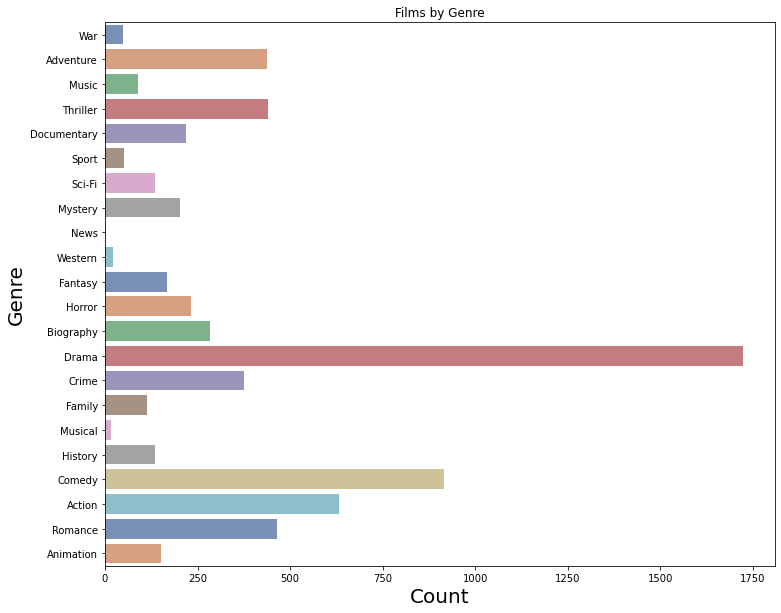

In [57]:
# Set the style of the seaborn plot to have a white background with gray lines. 
#sns.set(style="whitegrid")
# Set the scale plot to be larger and easier to read.
#sns.set_context("talk")
# Create a plot and size it appropriately for information shown
plt.figure(figsize=(12,10))
# Draw the seaborn barplot
sns.barplot(y = keys, x = values, alpha=0.8, palette="deep")
# Set the barplot's title.
plt.title('Films by Genre')
# Label the y-axis
plt.ylabel('Genre', fontsize=20)
# Label the x-axis
plt.xlabel('Count', fontsize=20)

# Show the plot                
plt.show()

In [ ]:
# Interesting to get the average domestic gross of each genre

<AxesSubplot:>

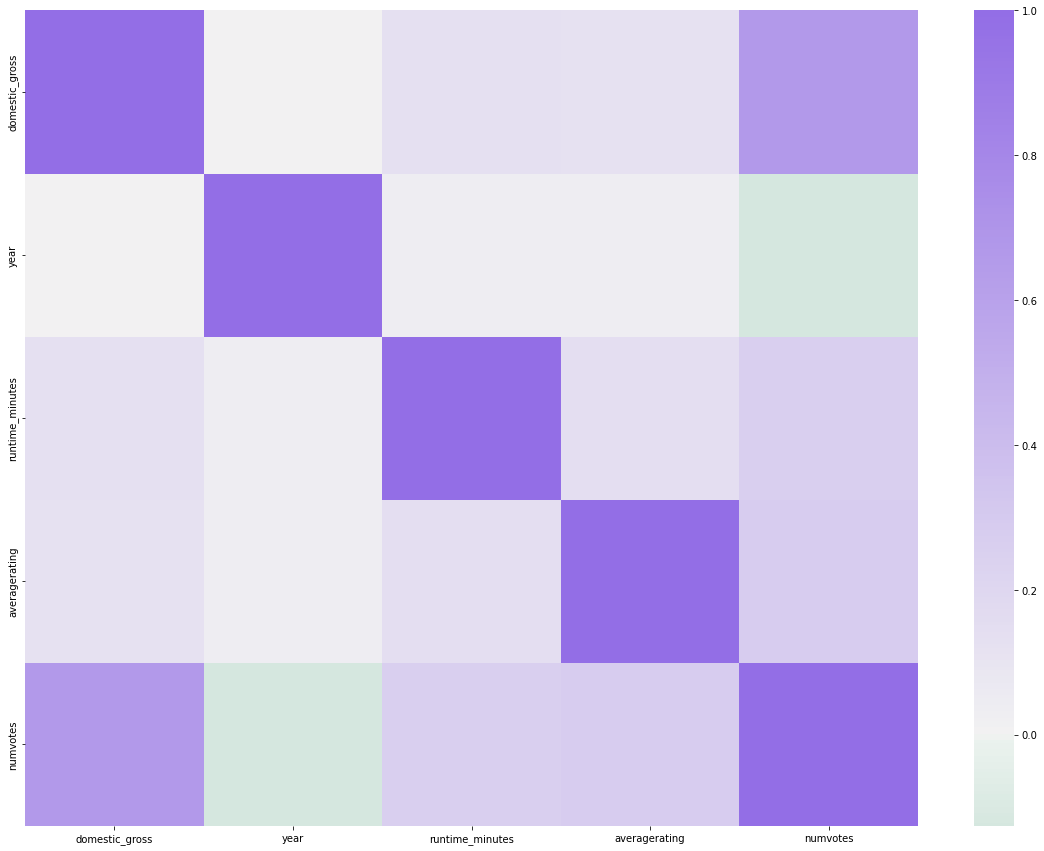

In [82]:
# Create a seaborn heatmap to show correlations
fig, ax = plt.subplots(figsize=(20,15))
cmap = sns.diverging_palette(150, 275, s=80, l=55, n=9, as_cmap=True)
sns.heatmap(clean_df.corr(), center=0, cmap=cmap, robust=True)